In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\data.csv") 
df=pd.DataFrame(df)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [3]:
from sklearn.impute import SimpleImputer
imp_median= SimpleImputer(missing_values=np.nan, strategy='median')
dt=imp_median.fit_transform(df)
data=pd.DataFrame(dt,columns=df.columns)
data = data.astype(df.dtypes.to_dict())
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0.0,3.0,0


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
data['condition'] = data['condition'].apply(lambda x: 1 if x > 1 else x)
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal', 'fbs', 'exang']
for col in categorical_cols:
    ohe = OneHotEncoder(sparse_output=False)
    encoded = ohe.fit_transform(data[[col]])
    data[col] = encoded.tolist()

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,"[0.0, 1.0]","[1.0, 0.0, 0.0, 0.0]",145,233,"[0.0, 1.0]","[0.0, 0.0, 1.0]",150,"[1.0, 0.0]",2.3,"[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0]",0
1,67,"[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",160,286,"[1.0, 0.0]","[0.0, 0.0, 1.0]",108,"[0.0, 1.0]",1.5,"[0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]",1
2,67,"[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",120,229,"[1.0, 0.0]","[0.0, 0.0, 1.0]",129,"[0.0, 1.0]",2.6,"[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",1
3,37,"[0.0, 1.0]","[0.0, 0.0, 1.0, 0.0]",130,250,"[1.0, 0.0]","[1.0, 0.0, 0.0]",187,"[1.0, 0.0]",3.5,"[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0
4,41,"[1.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",130,204,"[1.0, 0.0]","[0.0, 0.0, 1.0]",172,"[1.0, 0.0]",1.4,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,"[0.0, 1.0]","[1.0, 0.0, 0.0, 0.0]",110,264,"[1.0, 0.0]","[1.0, 0.0, 0.0]",132,"[1.0, 0.0]",1.2,"[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0]",1
299,68,"[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",144,193,"[0.0, 1.0]","[1.0, 0.0, 0.0]",141,"[1.0, 0.0]",3.4,"[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",1
300,57,"[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",130,131,"[1.0, 0.0]","[1.0, 0.0, 0.0]",115,"[0.0, 1.0]",1.2,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]",1
301,57,"[1.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",130,236,"[1.0, 0.0]","[0.0, 0.0, 1.0]",174,"[1.0, 0.0]",0.0,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]",1


In [6]:
def expand_onehot(df, categorical_cols):
    expanded = []
    for col in categorical_cols:
        arr = np.array(df[col].tolist()) 
        colnames = [f"{col}{i}" for i in range(arr.shape[1])]
        expanded.append(pd.DataFrame(arr, columns=colnames))
    return pd.concat(expanded, axis=1)

categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal', 'fbs', 'exang']

categorical_expanded = expand_onehot(data, categorical_cols)

data = pd.concat([
    data.drop(columns=categorical_cols).reset_index(drop=True),
    categorical_expanded.reset_index(drop=True)
], axis=1)


In [7]:
data

,age,trestbps,chol,thalach,oldpeak,condition,sex0,sex1,cp0,cp1,...,ca1,ca2,ca3,thal0,thal1,thal2,fbs0,fbs1,exang0,exang1
0,63,145,233,150,2.3,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,67,160,286,108,1.5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,67,120,229,129,2.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,41,130,204,172,1.4,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
299,68,144,193,141,3.4,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
300,57,130,131,115,1.2,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
301,57,130,236,174,0.0,1,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
scaler = MinMaxScaler()
features = data.drop(columns=['condition'])
scaled = scaler.fit_transform(features)
scaled_data = pd.DataFrame(
    scaled,
    columns=features.columns,
    index=features.index
)
scaled_data

,age,trestbps,chol,thalach,oldpeak,sex0,sex1,cp0,cp1,cp2,...,ca1,ca2,ca3,thal0,thal1,thal2,fbs0,fbs1,exang0,exang1
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
301,0.583333,0.339623,0.251142,0.786260,0.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
preprocessed_data = data
preprocessed_data = scaled_data

preprocessed_data

,age,trestbps,chol,thalach,oldpeak,sex0,sex1,cp0,cp1,cp2,...,ca1,ca2,ca3,thal0,thal1,thal2,fbs0,fbs1,exang0,exang1
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
301,0.583333,0.339623,0.251142,0.786260,0.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [10]:
preprocessed_data = pd.concat([ preprocessed_data , data['condition']], axis=1)
preprocessed_data

,age,trestbps,chol,thalach,oldpeak,sex0,sex1,cp0,cp1,cp2,...,ca2,ca3,thal0,thal1,thal2,fbs0,fbs1,exang0,exang1,condition
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
301,0.583333,0.339623,0.251142,0.786260,0.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


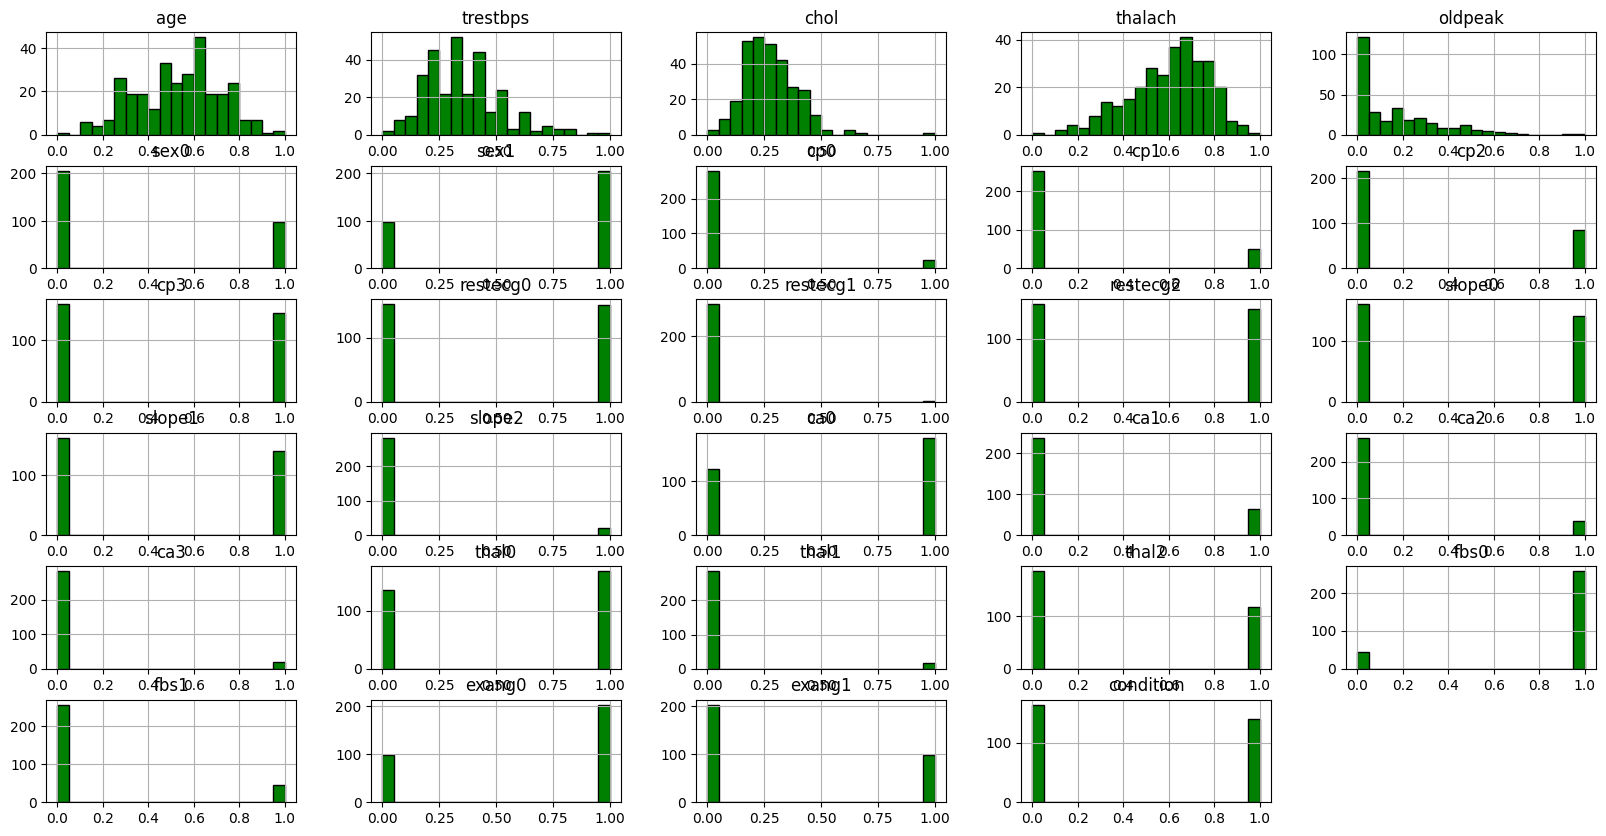

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
preprocessed_data.hist(bins=20, color='green' ,edgecolor='black', figsize=(20, 10))
plt.show()

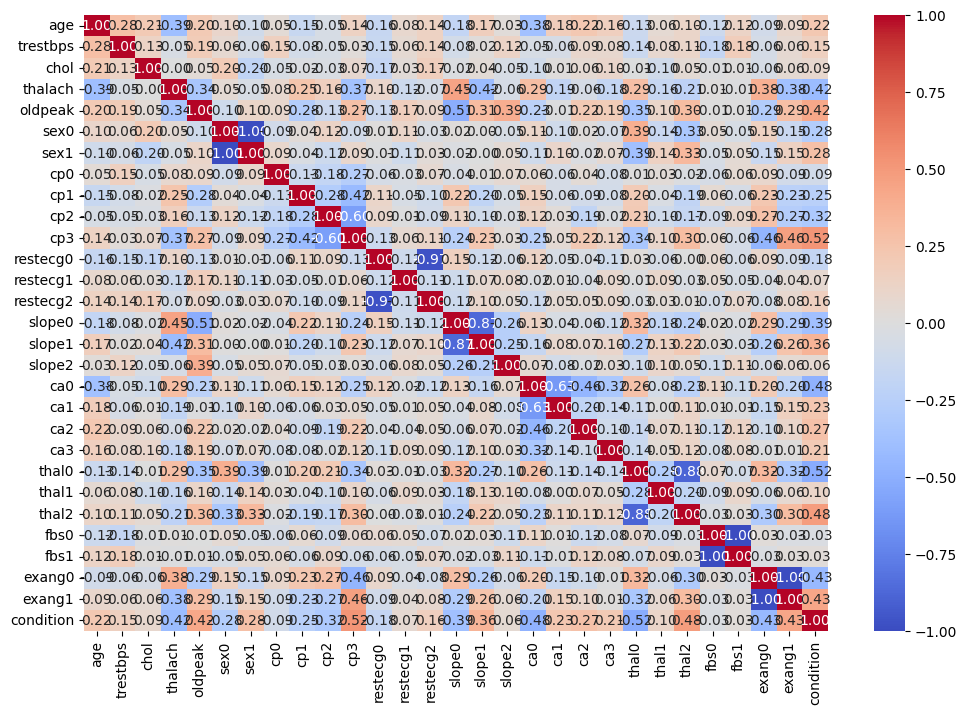

In [12]:
plt.figure(figsize=(12, 8))
corr=preprocessed_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


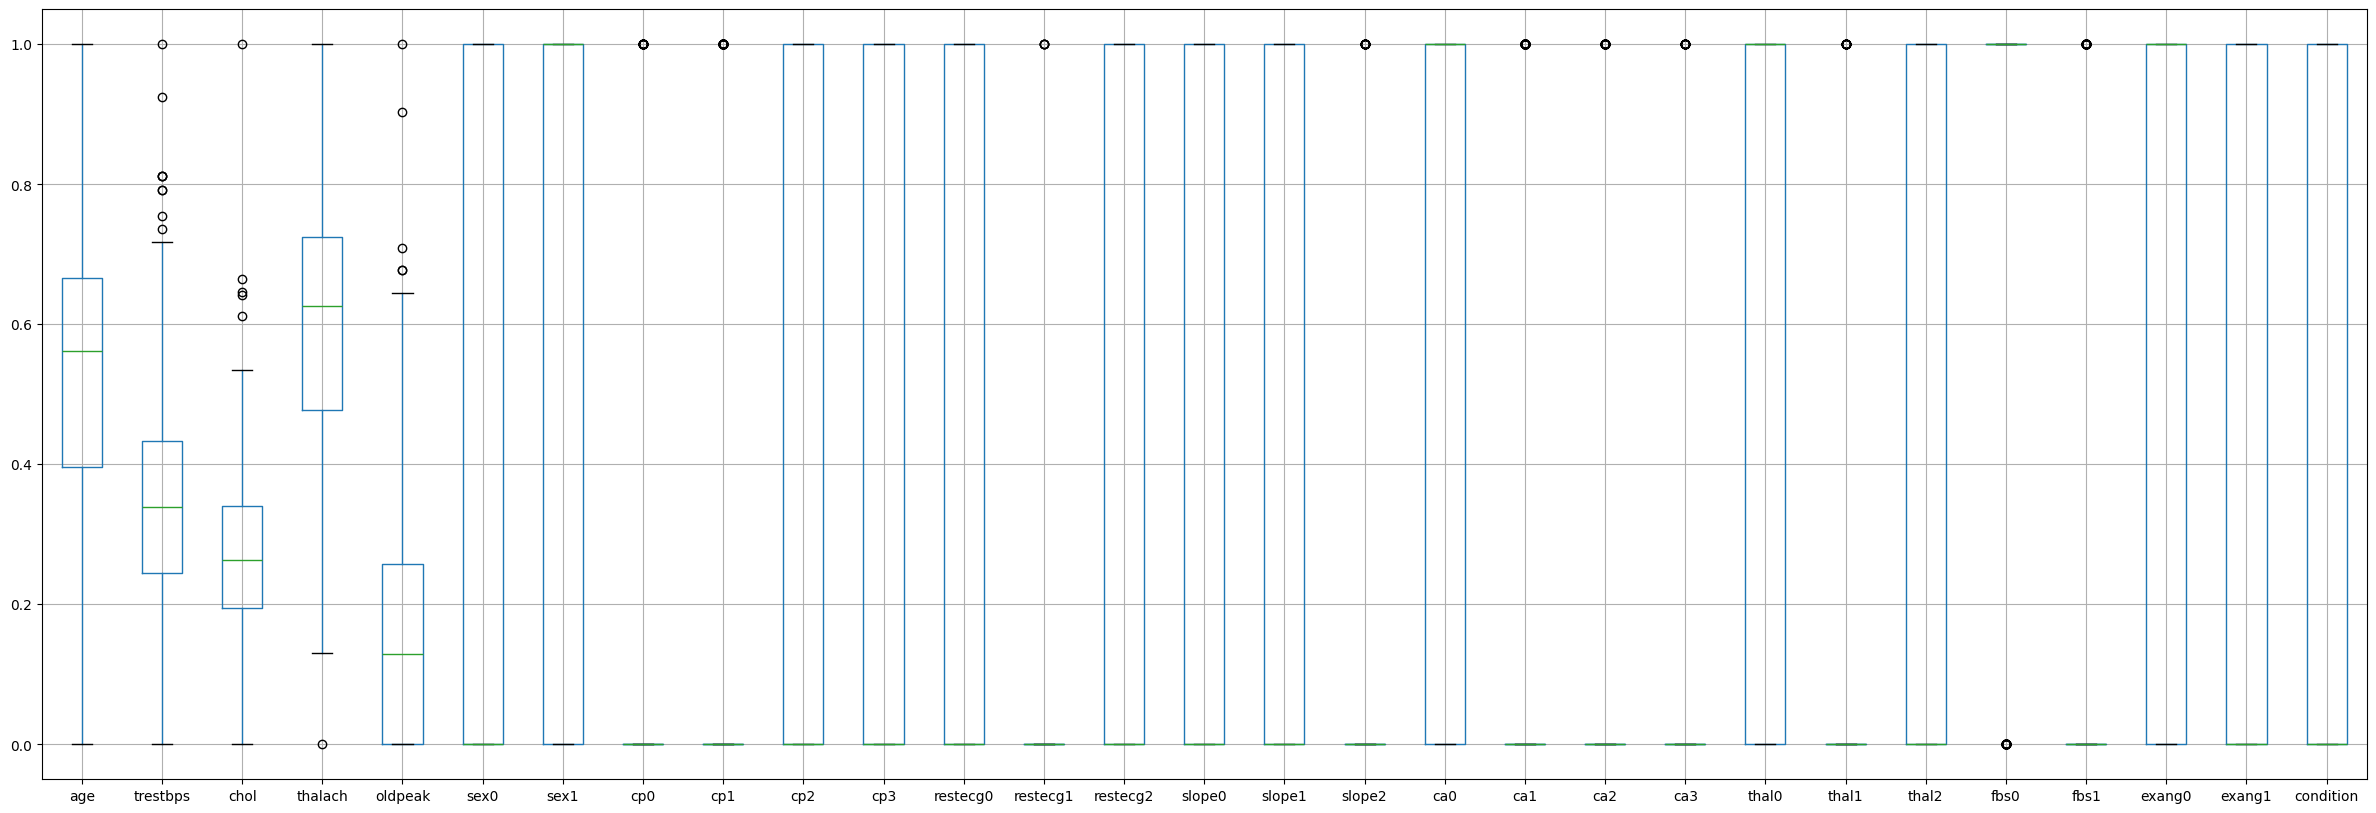

In [13]:
preprocessed_data.boxplot( figsize=(30, 10))
plt.show()

In [14]:
preprocessed_data.to_csv('C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\preprocessed_data.csv', index=False)

In [16]:
import joblib
joblib.dump(scaler, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\scaler.pkl')
joblib.dump(ohe, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\one_hot.pkl')

['C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\one_hot.pkl']